# 1회차 실습 과제: 통계적 사고와 기술통계

## 문제 항목

| 문제 | 주제 | 사용 데이터 |
|------|------|-----------|
| 문제 1 | 중심 경향 측도 (평균, 중앙값, 최빈값, 절사평균, 가중평균) | EMISSIONS |
| 문제 2 | 산포도 측도 (분산, 표준편차, 범위, IQR, 변동계수, 이상치 탐지) | COMB (L/100 km), ENGINE SIZE |
| 문제 3 | 분포의 형태 (왜도, 첨도) | 수치형 변수 전체 |
| 도전 과제 | 라이브러리 없이 기술통계 직접 구현 | 순수 Python |

---

## 데이터 설명

**파일명**: `차량_연비_데이터(2000-2022).csv`

2000~2022년 차량 연비 데이터

| 컬럼 | 설명 |
|------|------|
| YEAR | 차량 제조 연도 |
| MAKE | 제조사 (예: 현대, BMW) |
| MODEL | 차량 모델명 (예: Sonata, Model S) |
| VEHICLE CLASS | 차량 분류 (예: SUV, 세단). 4WD/4X4: 사륜구동, AWD: 전륜구동, FFV: 유연연료 차량 |
| ENGINE SIZE | 엔진 배기량 (단위: 리터) |
| CYLINDERS | 실린더 개수. 출력과 연비에 영향 |
| TRANSMISSION | 변속기 종류. A: 자동, M: 수동, AS: 자동 선택변속기, AV: 무단변속기. 숫자는 기어 수(3~10단) |
| FUEL | 연료 종류. X: 일반 가솔린, Z: 고급 가솔린, D: 디젤, E: 에탄올(E85), N: 천연가스 |
| CITY (L/100 km) | 도심 연비 (연료 소비량) |
| HWY (L/100 km) | 고속도로 연비 (연료 소비량) |
| COMB (L/100 km) | 복합 연비. 도심(55%) + 고속도로(45%) 종합 |
| COMB (mpg) | 복합 연비 (단위: MPG) |
| EMISSIONS | CO2 배출량 (단위: g/km) |

---

In [1]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import platform
import os

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print("="*60)
print("1회차 실습 과제: 통계적 사고와 기술통계")
print("="*60)


1회차 실습 과제: 통계적 사고와 기술통계


In [2]:
# 데이터 로드
DATA_PATH = os.path.join('data', '차량_연비_데이터(20022022).csv')
df = pd.read_csv(DATA_PATH)

# 데이터 기본 검증
df.info()
df.head()

<class 'pandas.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEAR             22556 non-null  int64  
 1   MAKE             22556 non-null  str    
 2   MODEL            22556 non-null  str    
 3   VEHICLE CLASS    22556 non-null  str    
 4   ENGINE SIZE      22556 non-null  float64
 5   CYLINDERS        22556 non-null  int64  
 6   TRANSMISSION     22556 non-null  str    
 7   FUEL             22556 non-null  str    
 8   CITY (L/100 km)  22556 non-null  float64
 9   HWY (L/100 km)   22556 non-null  float64
 10  COMB (L/100 km)  22556 non-null  float64
 11  COMB (mpg)       22556 non-null  int64  
 12  EMISSIONS        22556 non-null  int64  
dtypes: float64(4), int64(4), str(5)
memory usage: 2.2 MB


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [3]:
# 데이터 전처리
df['VEHICLE CLASS'] = (df['VEHICLE CLASS']
                       .str.upper()
                       .str.replace(':', ' -')
                       .str.replace('  ', ' ')
                       .str.strip())

# 범주 값별 빈도 확인
df['VEHICLE CLASS'].value_counts()

VEHICLE CLASS
COMPACT                     3127
MID-SIZE                    2960
SUV                         2640
PICKUP TRUCK - STANDARD     2204
SUBCOMPACT                  2010
SUV - SMALL                 1756
FULL-SIZE                   1503
TWO-SEATER                  1312
SUV - STANDARD              1122
MINICOMPACT                  994
STATION WAGON - SMALL        877
PICKUP TRUCK - SMALL         511
MINIVAN                      408
STATION WAGON - MID-SIZE     387
VAN - CARGO                  332
VAN - PASSENGER              299
SPECIAL PURPOSE VEHICLE      114
Name: count, dtype: int64

---

## 📝 실습 문제 1: 중심 경향 측도

### 배경
차량의 **EMISSIONS(CO2 배출량)** 데이터로 다양한 대표값을 계산하고 비교합니다.

### 이론 복습

| 대표값 | 특징 | 이상치 민감도 |
|--------|------|:-------------:|
| 산술평균 | 모든 값 반영 | 매우 민감 |
| 중앙값 | 정렬 후 가운데 값 | 강건함 |
| 최빈값 | 가장 빈번한 값 | - |
| 절사평균 | 양끝 제거 후 평균 | 중간 |
| 가중평균 | 가중치 반영 평균 | 매우 민감 |

### 수행할 작업
1. EMISSIONS의 산술평균, 중앙값, 최빈값 계산
2. 10%, 20% 절사평균 계산 및 산술평균과 비교
3. 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
4. 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
5. 결과 해석: 어떤 상황에서 어떤 대표값이 적절한지 정리

In [4]:
# TODO 1: 기본 대표값 계산 (산술평균, 중앙값, 최빈값)
print(f"가격 평균: {df['EMISSIONS'].mean():.2f}")
print(f"가격 중앙값: {df['EMISSIONS'].median():.2f}")
print(f"가격 최빈값: {df['EMISSIONS'].mode().values}")

# TODO 2: 10%, 20% 절사평균 계산 및 산술평균과 비교
print(f"가격 10% 절사평균: {stats.trim_mean(df['EMISSIONS'], 0.1):.2f}")
print(f"가격 20% 절사평균: {stats.trim_mean(df['EMISSIONS'], 0.2):.2f}")

# TODO 3: 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
print(f"차량등급의 가중 평균(COMPACT 50%, MID-SIZE 30%, SUV 20%): {np.average(df.loc[df['VEHICLE CLASS'].isin(['COMPACT', 'MID-SIZE', 'SUV']), 'EMISSIONS'], weights=[0.5 if x == 'COMPACT' else 0.3 if x == 'MID-SIZE' else 0.2 for x in df.loc[df['VEHICLE CLASS'].isin(['COMPACT', 'MID-SIZE', 'SUV']), 'VEHICLE CLASS']]):.2f}")

# TODO 4: 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
print(f"중앙값: {df.groupby('VEHICLE CLASS')['EMISSIONS'].median()}")
print(f"평균값: {df.groupby('VEHICLE CLASS')['EMISSIONS'].mean()}")

# TODO 5: 결과 해석 (print문으로 작성)
print("COMPACT 차량은 평균과 중앙값이 비슷하여 데이터가 비교적 균형잡혀 있음을 나타냅니다.")
print("MID-SIZE 차량은 평균이 중앙값보다 높아 일부 고배출 차량이 평균을 끌어올리고 있음을 시사합니다.")
print("SUV 차량은 평균이 중앙값보다 훨씬 높아 고배출 차량의 영향이 큼을 나타냅니다.")

가격 평균: 250.07
가격 중앙값: 243.00
가격 최빈값: [221]
가격 10% 절사평균: 247.34
가격 20% 절사평균: 245.40
차량등급의 가중 평균(COMPACT 50%, MID-SIZE 30%, SUV 20%): 225.58
중앙값: VEHICLE CLASS
COMPACT                     207.0
FULL-SIZE                   255.0
MID-SIZE                    221.0
MINICOMPACT                 240.5
MINIVAN                     253.0
PICKUP TRUCK - SMALL        268.0
PICKUP TRUCK - STANDARD     301.0
SPECIAL PURPOSE VEHICLE     232.0
STATION WAGON - MID-SIZE    230.0
STATION WAGON - SMALL       200.0
SUBCOMPACT                  228.0
SUV                         267.0
SUV - SMALL                 228.0
SUV - STANDARD              303.0
TWO-SEATER                  258.0
VAN - CARGO                 324.0
VAN - PASSENGER             343.0
Name: EMISSIONS, dtype: float64
평균값: VEHICLE CLASS
COMPACT                     211.539175
FULL-SIZE                   259.609448
MID-SIZE                    223.700676
MINICOMPACT                 236.807847
MINIVAN                     250.333333
PICKUP TRUCK - SMA

---

## 📝 실습 문제 2: 산포도 측도

### 배경
**COMB (L/100 km)** 와 **ENGINE SIZE**의 산포를 분석합니다.

### 이론 복습

| 지표 | 계산 방식 | 이상치 민감도 |
|------|----------|:------------:|
| 분산/표준편차 | 평균 기준 편차 제곱 | 민감 |
| 범위 | 최대 - 최소 | 매우 민감 |
| IQR | Q3 - Q1 | 강건 |

### 이상치 탐지 방법
- **IQR 방법**: Q1 - 1.5×IQR 미만 또는 Q3 + 1.5×IQR 초과
- **Z-score 방법**: |Z| > 2 또는 3

### 수행할 작업
1. 두 변수의 분산, 표준편차, 범위, IQR 계산
2. 변동계수(CV) 계산하여 상대적 산포 비교
3. IQR 방법과 Z-score 방법으로 이상치 탐지 및 비교
4. 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
5. 차량등급별(COMPACT, MID-SIZE, SUV) 두 변수의 표준편차 비교
6. 결과 해석

In [5]:
# TODO 1: 두 변수의 산포 측도 계산

print(f""" COMB(L/100 km)
분산: {df['COMB (L/100 km)'].var():.2f}
표준편차: {df['COMB (L/100 km)'].std():.2f}
범위: {df['COMB (L/100 km)'].max() - df['COMB (L/100 km)'].min():.2f}
IQR: {stats.iqr(df['COMB (L/100 km)']):.2f}
""")

print(f""" ENGINE SIZE
분산: {df['ENGINE SIZE'].var():.2f}
표준편차: {df['ENGINE SIZE'].std():.2f}
범위: {df['ENGINE SIZE'].max() - df['ENGINE SIZE'].min():.2f}
IQR: {stats.iqr(df['ENGINE SIZE']):.2f}
""")

 COMB(L/100 km)
분산: 8.47
표준편차: 2.91
범위: 22.50
IQR: 3.60

 ENGINE SIZE
분산: 1.78
표준편차: 1.34
범위: 7.60
IQR: 1.90



In [6]:
# TODO 2: 변동계수(CV) 계산
print(f"COMB(L/100km)변수의 변동계수(CV): {df['COMB (L/100 km)'].std() / df['COMB (L/100 km)'].mean() * 100:.2f}%")
print(f"ENGINE SIZE변수의 변동계수(CV): {df['ENGINE SIZE'].std() / df['ENGINE SIZE'].mean() * 100:.2f}%")

COMB(L/100km)변수의 변동계수(CV): 26.38%
ENGINE SIZE변수의 변동계수(CV): 39.78%


In [7]:
# TODO 3: 이상치 탐지 (IQR, Z-score)
# COMB (L/100 km)의 IQR 방법
Q1, Q3 = df['COMB (L/100 km)'].quantile(0.25), df['COMB (L/100 km)'].quantile(0.75)
IQR = Q3 - Q1
outliers = df['COMB (L/100 km)'][(df['COMB (L/100 km)'] < Q1 - 1.5*IQR) | (df['COMB (L/100 km)'] > Q3 + 1.5*IQR)]

# COMB (L/100 km)의 Z-score 방법
z_scores = (df['COMB (L/100 km)'] - df['COMB (L/100 km)'].mean()) / df['COMB (L/100 km)'].std()
outliers = df['COMB (L/100 km)'][np.abs(z_scores) > 2]  # 또는 > 3

# TODO 3: 이상치 탐지 (IQR, Z-score)
# ENGINE SIZE의 IQR 방법
Q1, Q3 = df['ENGINE SIZE'].quantile(0.25), df['ENGINE SIZE'].quantile(0.75)
IQR = Q3 - Q1
outliers = df['ENGINE SIZE'][(df['ENGINE SIZE'] < Q1 - 1.5*IQR) | (df['ENGINE SIZE'] > Q3 + 1.5*IQR)]

# ENGINE SIZE의 Z-score 방법
z_scores = (df['ENGINE SIZE'] - df['ENGINE SIZE'].mean()) / df['ENGINE SIZE'].std()
outliers = df['ENGINE SIZE'][np.abs(z_scores) > 2]  # 또는 > 3

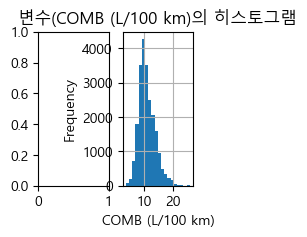

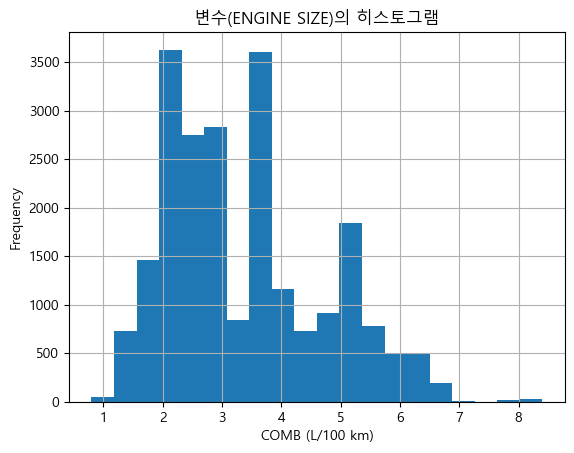

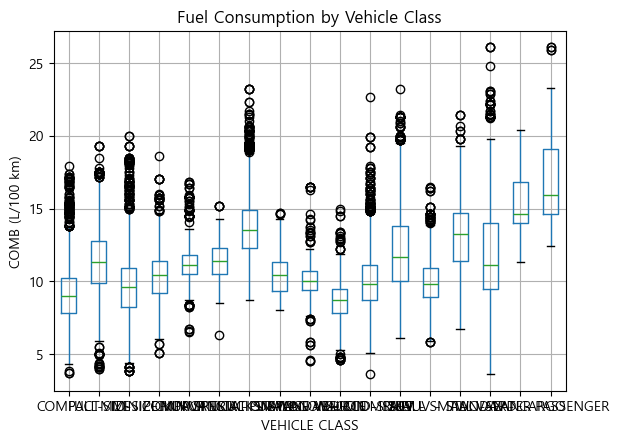

In [22]:
# TODO 4: 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
# 시각화
fig, axes = plt.subplots(1, 2, figsize=(2, 2))

# 히스토그램1
df['COMB (L/100 km)'].hist(bins=20)
plt.xlabel('COMB (L/100 km)')
plt.ylabel('Frequency')
plt.title('변수(COMB (L/100 km)의 히스토그램')
plt.show()

#히스토그램2
df['ENGINE SIZE'].hist(bins=20)
plt.xlabel('COMB (L/100 km)')
plt.ylabel('Frequency')
plt.title('변수(ENGINE SIZE)의 히스토그램')
plt.show()

# 박스플롯
df.boxplot(column='COMB (L/100 km)', by='VEHICLE CLASS')
plt.ylabel('COMB (L/100 km)')
plt.title('Fuel Consumption by Vehicle Class')
plt.suptitle('')
plt.show()


In [ ]:
# TODO 5: 차량등급별(COMPACT, MID-SIZE, SUV) 표준편차 비교
std_by_class = (
    df.groupby('VEHICLE CLASS')['COMB (L/100 km)']
    .std()
)

print(std_by_class)

# TODO 6: 결과 해석
summary = (
    df.groupby('VEHICLE CLASS')['COMB (L/100 km)']
    .agg(['mean', 'std', 'count'])
)

print(summary)


VEHICLE CLASS
COMPACT                     2.060390
FULL-SIZE                   2.477528
MID-SIZE                    2.395101
MINICOMPACT                 1.994226
MINIVAN                     1.796342
PICKUP TRUCK - SMALL        1.278929
PICKUP TRUCK - STANDARD     2.377726
SPECIAL PURPOSE VEHICLE     1.570800
STATION WAGON - MID-SIZE    1.569175
STATION WAGON - SMALL       1.462460
SUBCOMPACT                  2.207391
SUV                         2.705243
SUV - SMALL                 1.585473
SUV - STANDARD              2.478799
TWO-SEATER                  3.485163
VAN - CARGO                 2.341578
VAN - PASSENGER             2.963499
Name: COMB (L/100 km), dtype: float64


---

## 📝 실습 문제 3: 분포의 형태 (왜도, 첨도)

### 배경
4가지 수치형 변수의 **왜도와 첨도**를 분석하여 분포 형태를 파악합니다.

### 이론 복습

**왜도**
| 왜도 | 의미 | 평균 vs 중앙값 |
|------|------|---------------|
| = 0 | 대칭 | 평균 ≈ 중앙값 |
| > 0 | 오른쪽 꼬리 | 평균 > 중앙값 |
| < 0 | 왼쪽 꼬리 | 평균 < 중앙값 |


**초과 첨도**
| 첨도 | 의미 |
|------|------|
| = 0 | 정규분포와 동일 |
| > 0 | 꼬리 두꺼움 (극단값 많음) |
| < 0 | 꼬리 얇음 (극단값 적음) |

### 수행할 작업
1. 4개 변수의 왜도/첨도 계산: ENGINE SIZE, COMB (L/100 km), COMB (mpg), EMISSIONS
2. 결과를 DataFrame으로 정리 (왜도/첨도 해석 컬럼 포함)
3. 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시)
    - 각 그래프에 평균(빨강)과 중앙값(초록) 수직선 표시
4. 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
5. 결과 해석

ENGINE SIZE의 왜도: 0.63
ENGINE SIZE의 첨도: -0.39
COMB (L/100 km)의 왜도: 0.82
COMB (L/100 km)의 첨도: 1.05
COMB (mpg)의 왜도: 1.17
COMB (mpg)의 첨도: 3.64
EMISSIONS의 왜도: 0.53
EMISSIONS의 첨도: 0.62


['ENGINE SIZE', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']

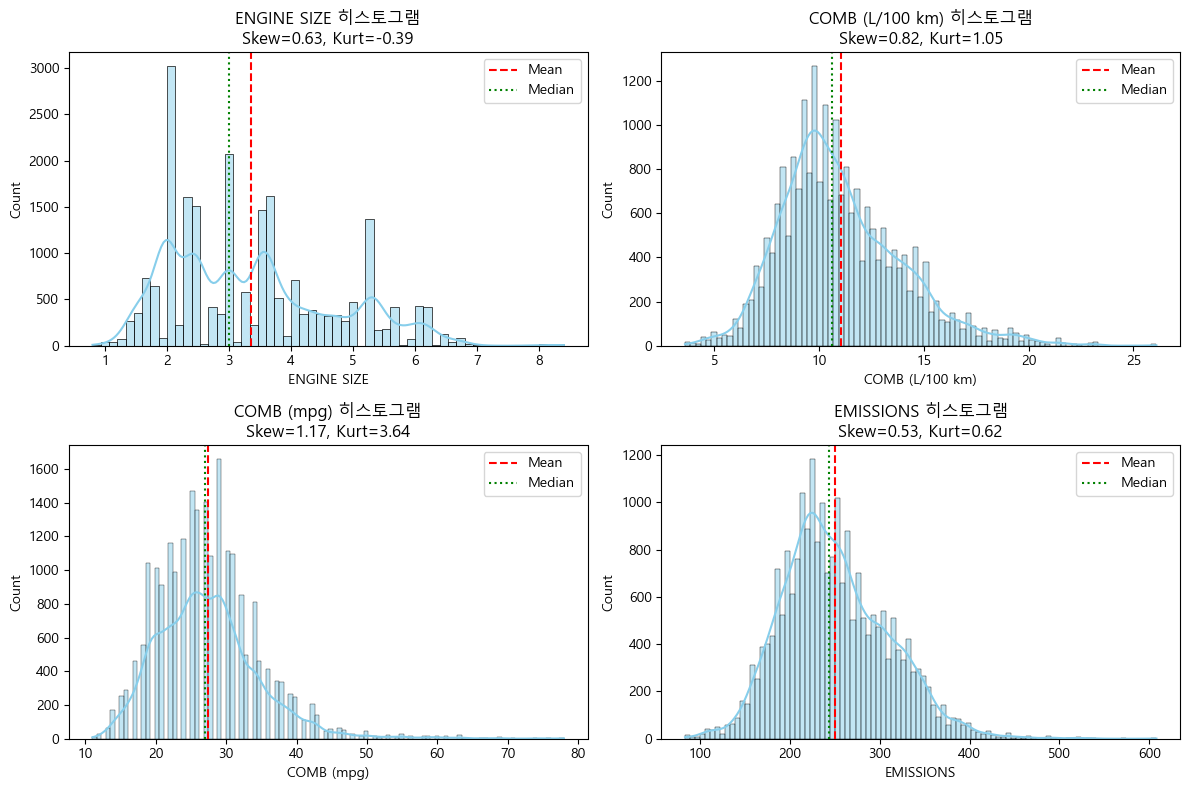

,왜도,첨도
FUEL,,
D,-0.367713,-1.042831
E,-0.189320,-0.256257
N,-1.851785,3.071255
X,0.330538,-0.292857
Z,0.997177,1.607523


In [29]:
numeric_cols = ['ENGINE SIZE', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']

# TODO 1: 왜도/첨도 계산
skew_dict = {col: df[col].skew() for col in numeric_cols}
kurt_dict = {col: df[col].kurt() for col in numeric_cols}



# TODO 2: 결과 DataFrame 정리 (왜도/첨도 해석 컬럼 포함)
for col in numeric_cols:
    print(f"{col}의 왜도: {skew_dict[col]:.2f}")
    print(f"{col}의 첨도: {kurt_dict[col]:.2f}")

display(numeric_cols)
# TODO 3: 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시, 평균/중앙값 수직선)
# 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 히스토그램+KDE 시각화
for ax, col in zip(axes.flatten(), numeric_cols):
    sns.histplot(df[col], kde=True, ax=ax, color='skyblue', edgecolor='black')
    ax.axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    ax.axvline(df[col].median(), color='green', linestyle=':', label='Median')
    ax.set_title(f"{col} 히스토그램\nSkew={skew_dict[col]:.2f}, Kurt={kurt_dict[col]:.2f}")
    ax.legend()

plt.tight_layout()
plt.show()

# TODO 4: 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
fuel_skew = df.groupby('FUEL')['EMISSIONS'].skew()
fuel_kurt = df.groupby('FUEL')['EMISSIONS'].kurt()
emission_result = pd.DataFrame({'왜도': fuel_skew, '첨도': fuel_kurt})
display(emission_result)

# TODO 5: 결과 해석

---

## 🏆 도전 과제: 라이브러리 없이 기술통계 직접 구현

numpy, scipy 없이 **순수 Python**으로 기술통계 함수를 구현합니다.

### 규칙
- `math.sqrt`만 사용 가능
- 내장 함수 `sum()`, `len()`, `sorted()`, `min()`, `max()` 사용 가능

### 구현할 함수

| 함수 | 설명 |
|------|------|
| `my_mean(data)` | 산술평균 |
| `my_trimmed_mean(data, proportion)` | 절사평균 (양쪽 proportion 비율 제거) |
| `my_weighted_mean(data, weights)` | 가중평균 |
| `my_median(data)` | 중앙값 |
| `my_mode(data)` | 최빈값 |
| `my_variance(data, ddof=0)` | 분산 (ddof=0: 모분산, ddof=1: 표본분산) |
| `my_std(data, ddof=0)` | 표준편차 |
| `my_percentile(data, q)` | 퍼센타일 (Nearest Rank 방식) |
| `my_iqr(data)` | 사분위범위 (Q3 - Q1) |

In [16]:
import math

# 산술평균: 데이터 합 / 데이터의 개수
def my_mean(data):
    return sum(data)/ len(data)

# 절사평균: 양쪽 끝에서 일정 비율을 제거한 후 평균
# 제거할 비율 (0 ~ 0.5 미만)
    # 0.1이면 양쪽에서 각각 10%씩 제거 (총 20% 제거)
    # 0.25이면 양쪽에서 각각 25%씩 제거 (총 50% 제거)
def my_trimmed_mean(data, proportion):
    data_sorted = sorted(data)
    n = len(data_sorted)
    trim_n = int(n * proportion)  # 양쪽 0.1(총 20% 제거)
    data_trim=data_sorted[trim_n : n -trim_n]
    return sum(data_trim)/len(data_trim)

# 가중평균: 각 값에 가중치를 곱한 후 평균 
# 가중치 리스트 (data와 길이가 같아야 함)
def my_weighted_mean(data, weights):
    weight_data_sum = 0
    weight_sum = 0
    for x, w in zip(data, weights):
        weight_data_sum+=x*w
        weight_sum+=w
    return weight_data_sum / weight_sum

#중앙값: 정렬 후 가운데 값 (짝수면 두 값의 평균)
def my_median(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    mid = n // 2
    if n % 2 == 0:
        return (sorted_data[mid - 1] + sorted_data[mid]) / 2
    else:
        return sorted_data[mid]

# 최빈값: 가장 빈번한 값
def my_mode(data):
    count= {}

    for i in data:
        count[i]=count.get(i, 0) + 1
    max_count = max(count.values())

    for i in data:
        if count[i] == max_count:
            return i

# 분산: 편차 제곱의 평균
def my_variance(data, ddof=0):
    mean = my_mean(data)
    n = len(data)
    return sum((x - mean) ** 2 for x in data) / (n - ddof)

# 표준편차
def my_std(data, ddof=0):
    return math.sqrt(my_variance(data, ddof))

#q번째 퍼센타일 (Nearest Rank 방식)
    # Notes
    # Nearest Rank 방식: 계산된 위치에서 가장 가까운 인덱스의 실제 값 반환
    # q=0: 최솟값, q=100: 최댓값, q=50: 중앙값 근사
def my_percentile(data, q):
    sorted_data = sorted(data)
    n = len(sorted_data)
    index = round((n-1)*q/100)
    return sorted_data[index]

# 사분위범위(IQR): Q3 - Q1 (Nearest Rank 방식)
def my_iqr(data):
    q1 = my_percentile(data, 25)
    q3 = my_percentile(data, 75)
    return q3 - q1

In [17]:
# 검증 코드
import numpy as np
from scipy import stats

print("\n" + "="*60)
print("검증 결과")
print("="*60)

# 테스트 데이터
test_data = [4, 7, 2, 9, 1, 5, 3, 8, 6, 5]
test_odd = [3, 1, 4, 1, 5]
test_single = [42]
test_same = [7, 7, 7, 7, 7]
test_negative = [-5, -2, 0, 3, 7]
test_outlier = [1, 2, 3, 4, 100]

all_pass = True
total = 0
passed = 0

def check(name, mine, expected, tol=0.001):
    global all_pass, total, passed
    total += 1
    if mine is None:
        print(f"  ❌ {name}: 미구현")
        all_pass = False
    else:
        try:
            match = abs(float(mine) - float(expected)) < tol
            if match:
                passed += 1
                print(f"  ✅ {name}: {float(mine):.4f}")
            else:
                all_pass = False
                print(f"  ❌ {name}: {float(mine):.4f} (정답: {float(expected):.4f})")
        except:
            all_pass = False
            print(f"  ❌ {name}: 오류 발생")

# 1. 산술평균
print("\n[my_mean]")
check("기본 데이터", my_mean(test_data), np.mean(test_data))
check("홀수 개", my_mean(test_odd), np.mean(test_odd))
check("단일 값", my_mean(test_single), np.mean(test_single))
check("음수 포함", my_mean(test_negative), np.mean(test_negative))

# 2. 절사평균
print("\n[my_trimmed_mean]")
check("20% 절사", my_trimmed_mean(test_outlier, 0.2), stats.trim_mean(test_outlier, 0.2))
check("10% 절사", my_trimmed_mean(test_data, 0.1), stats.trim_mean(test_data, 0.1))
check("0% 절사", my_trimmed_mean(test_data, 0), stats.trim_mean(test_data, 0))

# 3. 가중평균
print("\n[my_weighted_mean]")
check("학점 계산", my_weighted_mean([80, 90, 70], [3, 3, 2]), np.average([80, 90, 70], weights=[3, 3, 2]))
check("동일 가중치", my_weighted_mean([100, 200], [1, 1]), np.average([100, 200], weights=[1, 1]))
check("가중치 다름", my_weighted_mean([10, 20, 30], [1, 2, 3]), np.average([10, 20, 30], weights=[1, 2, 3]))

# 4. 중앙값
print("\n[my_median]")
check("짝수 개", my_median(test_data), np.median(test_data))
check("홀수 개", my_median(test_odd), np.median(test_odd))
check("단일 값", my_median(test_single), np.median(test_single))
check("음수 포함", my_median(test_negative), np.median(test_negative))

# 5. 최빈값
print("\n[my_mode]")
check("기본 (5가 2번)", my_mode(test_data), stats.mode(test_data, keepdims=False).mode)
check("홀수 (1이 2번)", my_mode(test_odd), stats.mode(test_odd, keepdims=False).mode)
check("동일 값", my_mode(test_same), stats.mode(test_same, keepdims=False).mode)

# 6. 분산
print("\n[my_variance]")
check("모분산 (ddof=0)", my_variance(test_data, 0), np.var(test_data, ddof=0))
check("표본분산 (ddof=1)", my_variance(test_data, 1), np.var(test_data, ddof=1))
check("동일 값 → 0", my_variance(test_same, 0), np.var(test_same, ddof=0))

# 7. 표준편차
print("\n[my_std]")
check("모표준편차", my_std(test_data, 0), np.std(test_data, ddof=0))
check("표본표준편차", my_std(test_data, 1), np.std(test_data, ddof=1))
check("동일 값 → 0", my_std(test_same, 0), np.std(test_same, ddof=0))

# 8. 퍼센타일 (Nearest Rank 방식)
# 주의: numpy는 선형보간 사용, Nearest Rank는 직접 계산
print("\n[my_percentile] - Nearest Rank 방식")
sorted_test = sorted(test_data)  # [1, 2, 3, 4, 5, 5, 6, 7, 8, 9]
check("0% (최솟값)", my_percentile(test_data, 0), min(test_data))
check("50% (중앙값)", my_percentile(test_data, 50), sorted_test[round((len(test_data)-1) * 0.5)])
check("100% (최댓값)", my_percentile(test_data, 100), max(test_data))
# 25%, 75%는 Nearest Rank 방식으로 직접 계산
check("25%", my_percentile(test_data, 25), sorted_test[round((len(test_data)-1) * 0.25)])
check("75%", my_percentile(test_data, 75), sorted_test[round((len(test_data)-1) * 0.75)])

# 9. IQR (Nearest Rank 기준)
print("\n[my_iqr]")
expected_iqr = sorted_test[round((len(test_data)-1) * 0.75)] - sorted_test[round((len(test_data)-1) * 0.25)]
check("기본 데이터", my_iqr(test_data), expected_iqr)
check("동일 값 → 0", my_iqr(test_same), 0)

# 최종 결과
print("\n" + "="*60)
print(f"결과: {passed}/{total} 통과 ({passed/total*100:.0f}%)")
print("="*60)
if all_pass:
    print("🎉 모든 테스트 통과!")
else:
    print("⚠️ 일부 테스트 실패 - 로직을 확인하세요")


검증 결과

[my_mean]
  ✅ 기본 데이터: 5.0000
  ✅ 홀수 개: 2.8000
  ✅ 단일 값: 42.0000
  ✅ 음수 포함: 0.6000

[my_trimmed_mean]
  ✅ 20% 절사: 3.0000
  ✅ 10% 절사: 5.0000
  ✅ 0% 절사: 5.0000

[my_weighted_mean]
  ✅ 학점 계산: 81.2500
  ✅ 동일 가중치: 150.0000
  ✅ 가중치 다름: 23.3333

[my_median]
  ✅ 짝수 개: 5.0000
  ✅ 홀수 개: 3.0000
  ✅ 단일 값: 42.0000
  ✅ 음수 포함: 0.0000

[my_mode]
  ✅ 기본 (5가 2번): 5.0000
  ✅ 홀수 (1이 2번): 1.0000
  ✅ 동일 값: 7.0000

[my_variance]
  ✅ 모분산 (ddof=0): 6.0000
  ✅ 표본분산 (ddof=1): 6.6667
  ✅ 동일 값 → 0: 0.0000

[my_std]
  ✅ 모표준편차: 2.4495
  ✅ 표본표준편차: 2.5820
  ✅ 동일 값 → 0: 0.0000

[my_percentile] - Nearest Rank 방식
  ✅ 0% (최솟값): 1.0000
  ✅ 50% (중앙값): 5.0000
  ✅ 100% (최댓값): 9.0000
  ✅ 25%: 3.0000
  ✅ 75%: 7.0000

[my_iqr]
  ✅ 기본 데이터: 4.0000
  ✅ 동일 값 → 0: 0.0000

결과: 30/30 통과 (100%)
🎉 모든 테스트 통과!
